2021-02-01    2.0
2021-06-07    1.9
dtype: float64


C:\Users\jayanti.prasad\AppData\Local\Temp\ipykernel_15100\2160352671.py:106: UserWarning: Parsing '31-12-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  X  = get_data ()


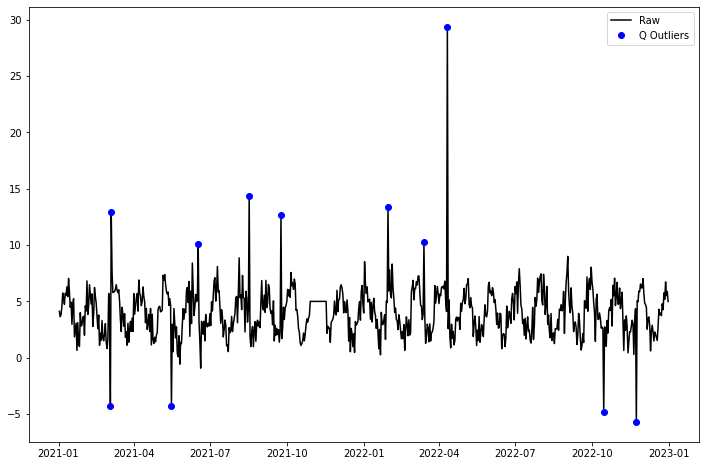

In [84]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 


def outliers_with_z (X, threshold):
   return X[((X-X.mean()).abs() > threshold * X.std())]
   

def outliers_with_quantile (X, threshold):
    Q1 = X.quantile(0.25)
    Q3 = X.quantile(0.75)
    IQR = Q3 - Q1
    Xout = X[((X < (Q1 - 1.5 * IQR)) |(X > (Q3 + 1.5 * IQR)))]
    return  Xout



# this is for kmeans 

def sampling_data (data, slide_len, segment_len):
    segments = []
    for start_pos in range(0, len(data), slide_len):
       end_pos = start_pos + segment_len
       # make a copy so changes to 'segments' doesn't modify the original ekg_data
       segment = np.copy(data[start_pos:end_pos])
       # if we're at the end and we've got a truncated segment, drop it
       if len(segment) != segment_len:
           continue
       segments.append(segment)
    return segments  



class KM_outliers:
   def __init__(self, num_clusters, segment_size,leg_size):
      self.num_clusters = num_clusters  
      self.segment_size  = segment_size  
      self.leg_size = leg_size  
      self.model = KMeans(n_clusters=self.num_clusters)
      self.__set_window()
      self.segments = None  

   def __set_window (self):
      window_rads = np.linspace(0,np.pi,self.segment_size)
      self.window = np.sin(window_rads)**2

   def training(self,data):

      windowed_segments = []
      self.segments = sampling_data(data,self.leg_size,self.segment_size)
      for segment in self.segments:
          windowed_segments.append(segment*self.window)

      self.model.fit(windowed_segments) 
  
   
   def reconstruct(self,data):

      reconstructed_data = np.zeros(len(data))

      for segment_n, segment in enumerate(self.segments):
         segment *= self.window
         segment = np.reshape(segment,(1,self.segment_size))
         nearest_match_idx = self.model.predict(segment)[0]
         nearest_match = np.copy(self.model.cluster_centers_[nearest_match_idx])
         pos = int(segment_n* self.leg_size)
         if pos+self.segment_size < len(data):
             reconstructed_data[pos:pos+self.segment_size] += nearest_match
    
      data_out = pd.Series (reconstructed_data)
      data_out.index = data.index 

      return data_out
    
    
    
def get_data ():
    T1 = 30
    dates = pd.date_range (start='01-02-2021',end='31-12-2022',freq='D')
    noise = np.random.normal (4.0,1.0, [len (dates)])
    t = np.linspace (0, len(dates), len(dates))
    y1 = 2.0 *  np.sin (2.0 * np.pi  * t /T1 )
    data = noise + y1 
    X = pd.Series (data=data, index=dates)
    
    rand_pos = np.random.randint (0, len(X),[20])
    rand_val1= np.random.normal (10.0,5.0,[10])
    rand_val2 = np.random.normal (2.0,5.0,[10])
    
    X.iloc[rand_pos[:10]] = rand_val1
    X.iloc[rand_pos[10:]] = rand_val2
    X.iloc[300:320] =5
    
    
    return X 
    
    
    
    
if __name__ == "__main__":
    
    X  = get_data ()
    
    
    KM_outliers (num_clusters, segment_size,leg_size)

    
    print(Y_Z)
    
    Y_Q = outliers_with_quantile (X, 0.003)
    
    
    
    fig, axs = plt.subplots(1,1,figsize=(12,8))
    
    axs.plot(X,'k-',label='Raw')
    #axs.plot(Y_Z,'ro',label='Z Outliers')
    axs.plot(Y_Q,'bo',label='Q Outliers')
    
    plt.legend()
    plt.show()
    
    
    
